# Nombre: Jorge Luis Tapia Peñaloza
# N Cuenta: A01793013
# Materia: Ciencia y analítica de datos (Gpo 10)
# Profesor: María de la Paz Rico Fernández
# Fecha: 09-11-22

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

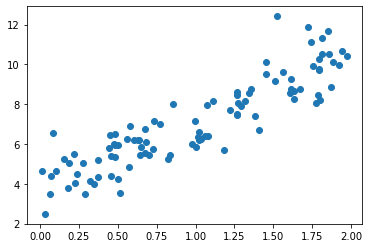

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

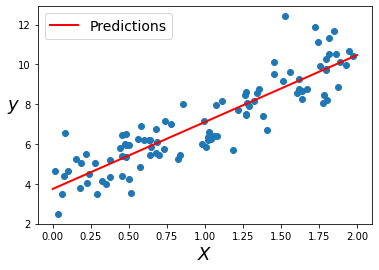

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

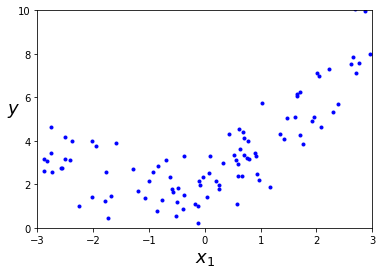

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

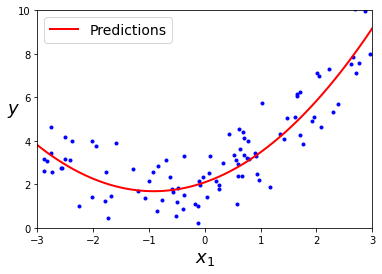

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [263]:
import pandas as pd
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

sns.set_style("whitegrid")

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
666,5.044218,31.066646
355,4.004383,23.287793
85,2.683485,48.300653
274,3.692641,53.734774
216,3.389469,53.431157
747,5.320845,39.790284
63,2.479723,59.129649
248,3.579993,44.520798
32,1.943029,61.277273
491,4.414818,49.992882


In [125]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [126]:
X.shape

(1000, 1)

In [127]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

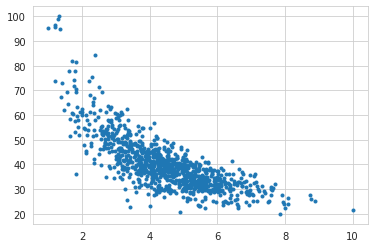

In [128]:
plt.plot(X,y,'.')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [212]:
r2s = []
maes = []

## lineal 

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [214]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 5.027116147815843
Mean Squared Error Train: 49.5228704761734
Root Mean Squared Error Train: 7.037248786008166
R2 score Train: 0.5826995379979889


Mean Absolute Error test: 4.794145851866064
Mean Squared Error test: 42.780320216201005
Root Mean Squared Error test: 6.540666649218641
R2 score test: 0.5670632183844507


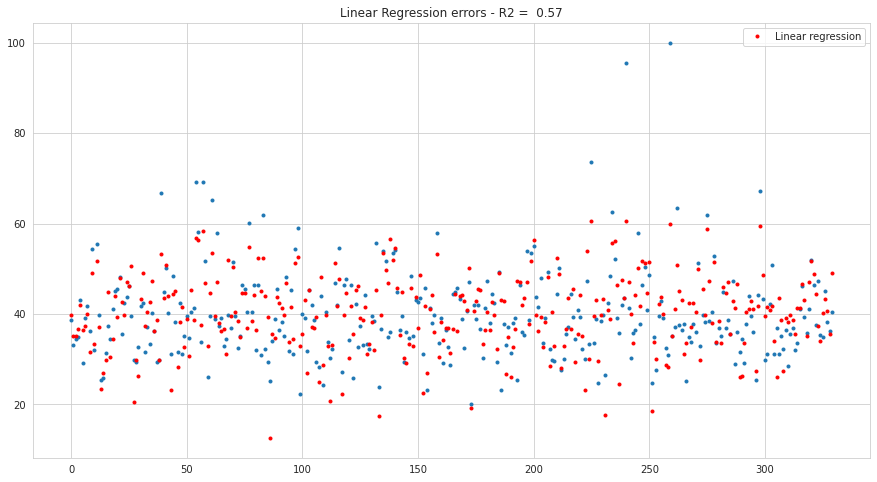

In [215]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f}",)
plt.legend();

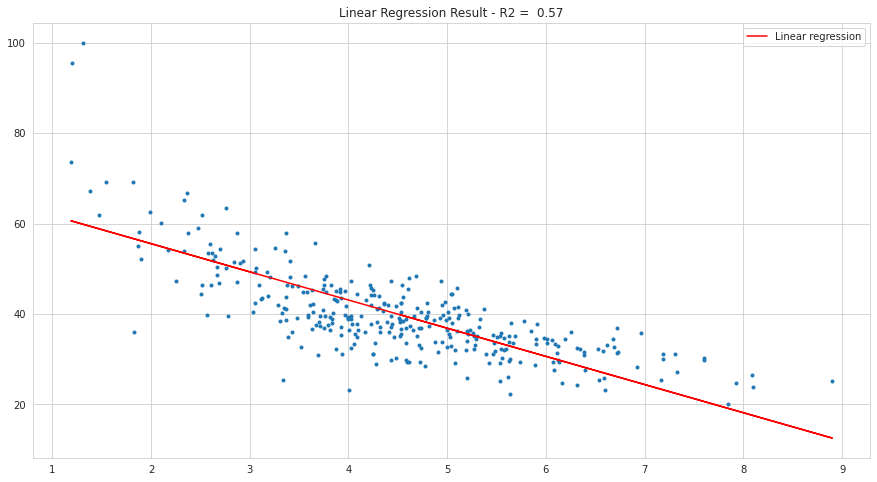

In [216]:
plt.figure(figsize = (15,8))
plt.plot(X_test,y_test,'.')
plt.plot(X_test,y_test_pred,"r",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [217]:
betas = model.coef_
intercept = model.intercept_
n_features = model.n_features_in_
model_string = f"y = " + "+".join([f"{beta: .2f} * X_{i+1}" for i,beta in enumerate(betas)]) + f" + {intercept: .2f}"

In [218]:
model_string

'y = -6.23 * X_1 +  68.03'

## polinomial

In [219]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False)),("scaler", StandardScaler()), ("model",LinearRegression())])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [220]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 4.620964222331545
Mean Squared Error Train: 38.89699821505916
Root Mean Squared Error Train: 6.236745803306333
R2 score Train: 0.6722375910450293


Mean Absolute Error test: 4.450570026138765
Mean Squared Error test: 35.14433265343322
Root Mean Squared Error test: 5.928265568733676
R2 score test: 0.6443394019934994


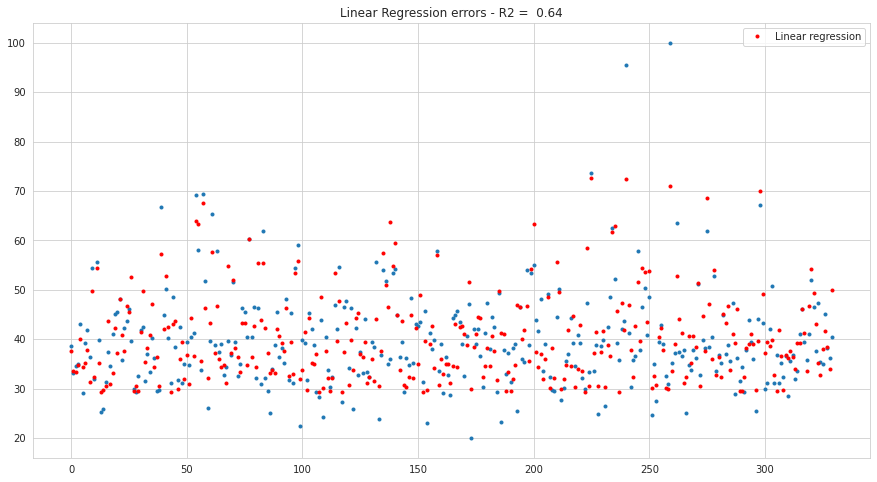

In [221]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f}",)
plt.legend();

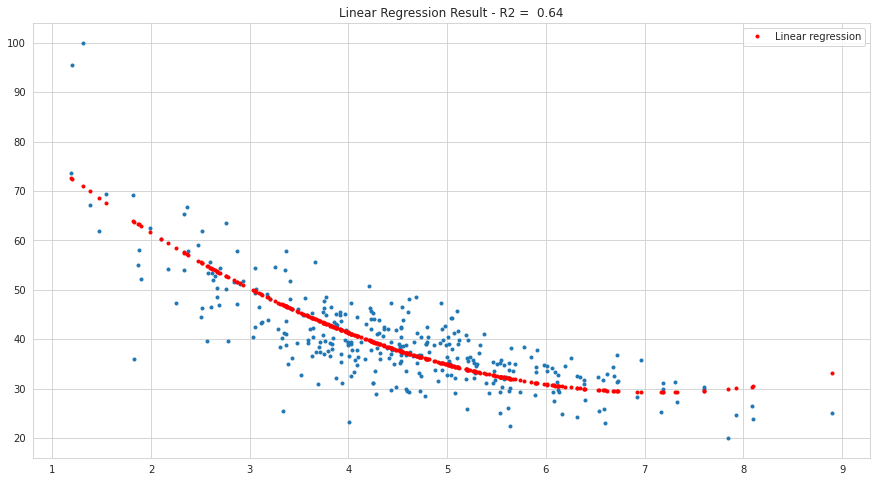

In [222]:
plt.figure(figsize = (15,8))
plt.plot(X_test,y_test,'.')
plt.plot(X_test,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [223]:
betas = model["model"].coef_
intercept = model["model"].intercept_
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names_out()
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"


In [224]:
model_string

'y = -23.36 * Number of Units + 15.39 * Number of Units^2 + 40.17'

## Ridge

In [225]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False)),("scaler", StandardScaler()), ("model",Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [226]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 4.585832788664424
Mean Squared Error Train: 39.94149111261174
Root Mean Squared Error Train: 6.319928093943138
R2 score Train: 0.6634362561362175


Mean Absolute Error test: 4.392301576869387
Mean Squared Error test: 35.09237187333617
Root Mean Squared Error test: 5.923881487110978
R2 score test: 0.6448652450164539


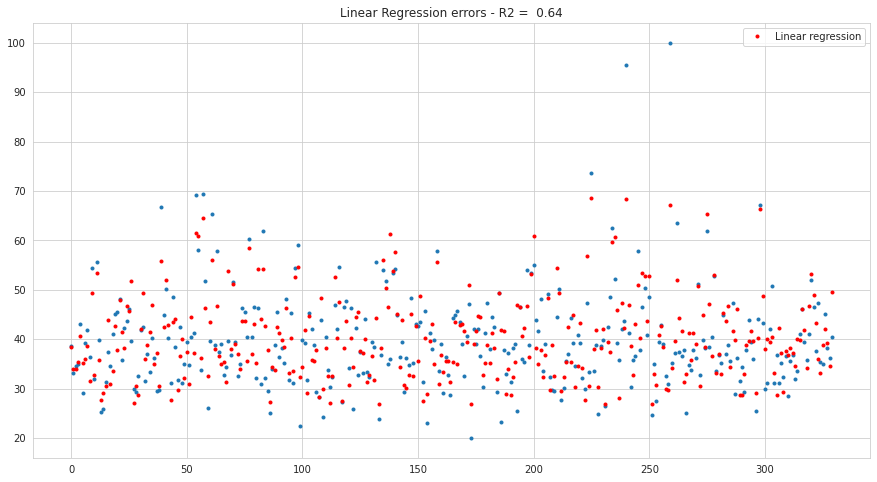

In [227]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f}",)
plt.legend();

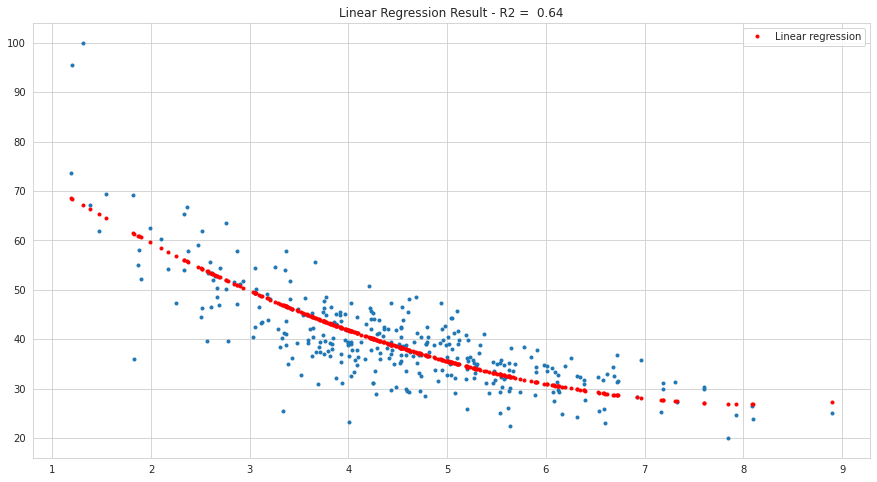

In [228]:
plt.figure(figsize = (15,8))
plt.plot(X_test,y_test,'.')
plt.plot(X_test,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [229]:
betas = model["model"].coef_
intercept = model["model"].intercept_
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names_out()
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"


In [230]:
model_string

'y = -18.55 * Number of Units + 10.61 * Number of Units^2 + 40.17'

## Lasso

In [231]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False)),("scaler", StandardScaler()), ("model",Lasso(random_state = 42))])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [232]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 4.990502000403533
Mean Squared Error Train: 50.522870476173395
Root Mean Squared Error Train: 7.107944180715926
R2 score Train: 0.5742731188912293


Mean Absolute Error test: 4.677800677545799
Mean Squared Error test: 42.17912652533467
Root Mean Squared Error test: 6.494545906014882
R2 score test: 0.5731472977072762


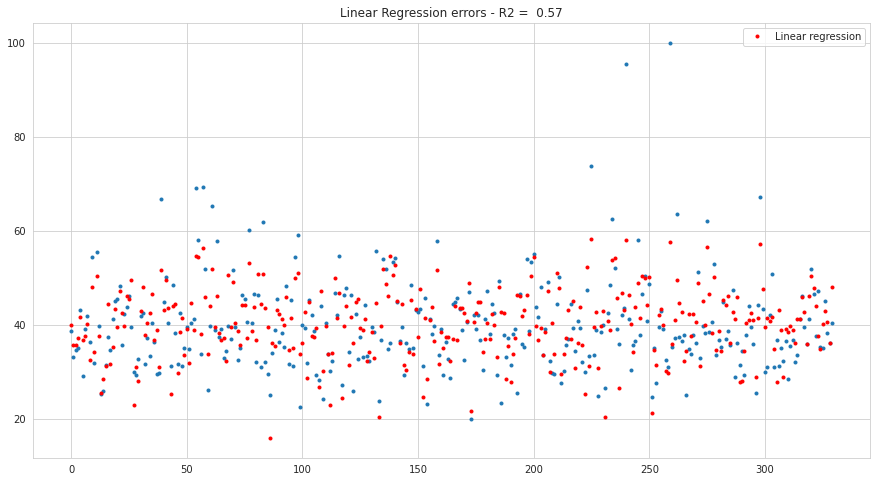

In [233]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f}",)
plt.legend();

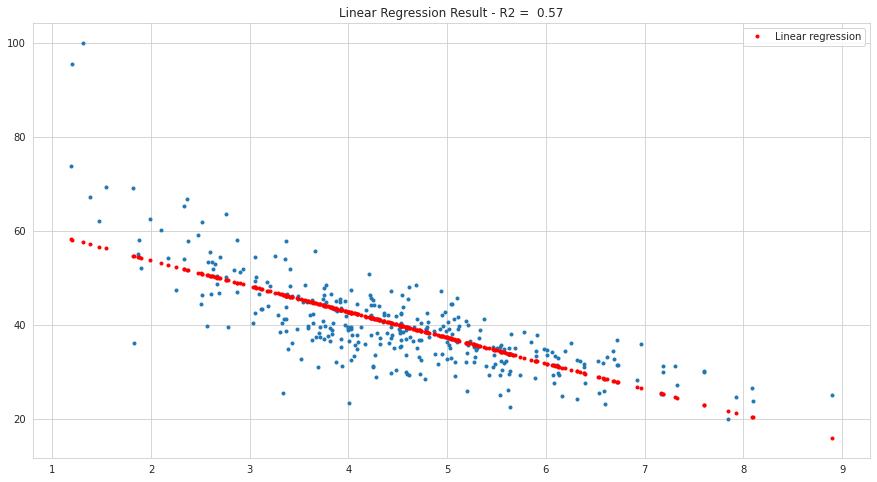

In [234]:
plt.figure(figsize = (15,8))
plt.plot(X_test,y_test,'.')
plt.plot(X_test,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [235]:
betas = model["model"].coef_
intercept = model["model"].intercept_
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names_out()
model_string = f"y = " + " +".join([f"{beta: .2f} * ({X_i})" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"


In [236]:
model_string

'y = -7.32 * (Number of Units) +-0.00 * (Number of Units^2) + 40.17'

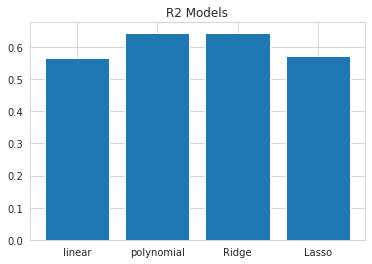

In [243]:

plt.bar(["linear","polynomial","Ridge","Lasso"], r2s)
plt.title( "R2 Models");

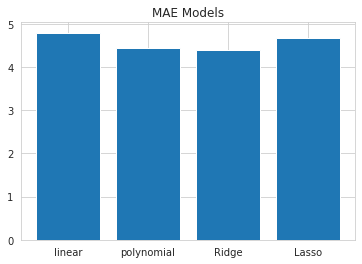

In [244]:

plt.bar(["linear","polynomial","Ridge","Lasso"], maes)
plt.title( "MAE Models");

* ¿que método conviene más a la empresa?
Ridge
* ¿por que?
Porque es el modelo que tiene mejores metricas junto con el polinomial, además que incorpora un metodo de regularización que evita el sobre ajuste.


* ¿que porcentajes de entrenamiento y evaluación usaste?
67% de entrenamiento y 33% para testeo 


* ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
 Tiene un r2 score de .64. Considero que es bueno porque analizando la forma de los datos con respecto a la variable explicativa tiene forma de un polinomio intentar aumentar el performance de otra manera solo generaria sobre ajuste.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [247]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7168,2487700130,20150406T000000,710000.0,4,2.5,2720,8000,1.0,0,0,...,7,1360,1360,1955,0,98136,47.5237,-122.391,1790,8000
6333,2624049169,20141211T000000,400000.0,3,1.5,1890,6183,1.0,0,0,...,7,1090,800,1967,0,98118,47.5396,-122.269,1750,6183
4218,1025039086,20140916T000000,1875000.0,3,2.5,3280,29111,2.0,1,3,...,11,3280,0,1925,0,98199,47.6699,-122.416,3530,21074
1524,3288200030,20140829T000000,405000.0,4,2.5,2030,9095,1.0,0,0,...,7,1130,900,1972,0,98034,47.7321,-122.185,1940,8000
4144,3260350090,20141112T000000,701000.0,4,3.0,2910,8540,2.0,0,0,...,9,2910,0,2003,0,98059,47.5223,-122.156,3040,6091
10769,3066400710,20150407T000000,720000.0,3,2.5,2520,10012,2.0,0,0,...,10,2520,0,1987,0,98074,47.6295,-122.051,2680,10071
20643,7853390260,20150205T000000,640000.0,4,3.5,3220,5741,2.0,0,0,...,9,3220,0,2013,0,98065,47.5169,-121.886,2960,6534
14401,9183701085,20150415T000000,302000.0,4,1.5,1790,10200,1.0,0,0,...,8,1210,580,1963,0,98030,47.3774,-122.225,1540,6600
18598,726049131,20150320T000000,325000.0,3,2.0,1750,9000,1.5,0,0,...,5,1750,0,1936,0,98133,47.7489,-122.350,1830,8100
15771,9279200280,20140623T000000,750000.0,3,2.0,1820,5000,1.5,0,0,...,8,1720,100,1941,0,98116,47.5845,-122.395,2220,7200


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [249]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [250]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


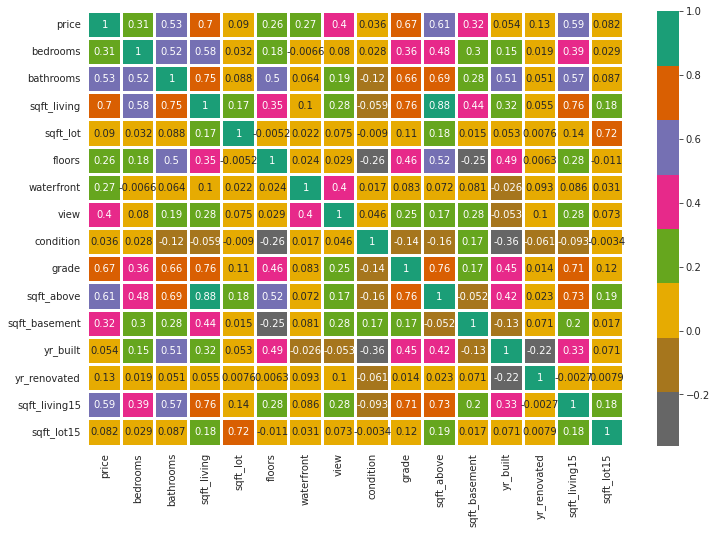

In [251]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [252]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [365]:
#tu codigo aquí
r2s = []
maes = []

## Linear

In [366]:
model = Pipeline(steps = [("scaler", StandardScaler()), ("model",LinearRegression())])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [367]:
r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 139269.32939116764
Mean Squared Error Train: 45896584783.58223
Root Mean Squared Error Train: 214234.8822754647
R2 score Train: 0.6529196653133833


Mean Absolute Error test: 137480.1388273265
Mean Squared Error test: 53885900364.491165
Root Mean Squared Error test: 232133.367624069
R2 score test: 0.6579723205007987


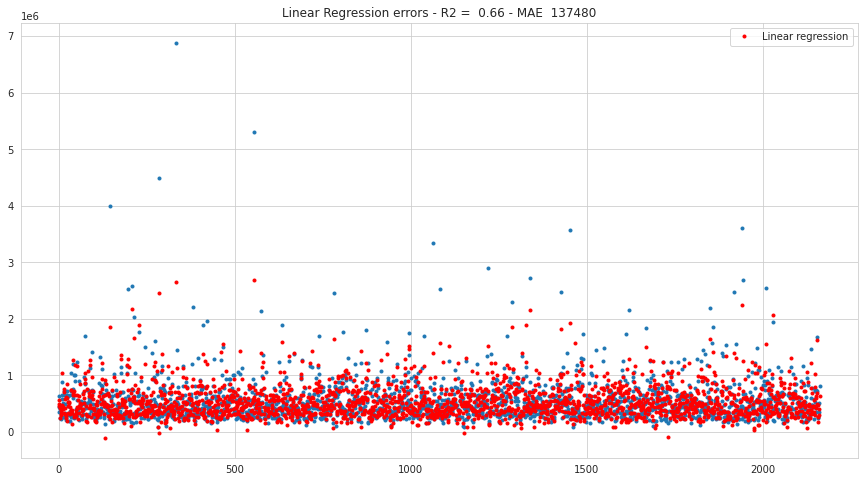

In [368]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f} - MAE {mae_test: .0f}",)
plt.legend();

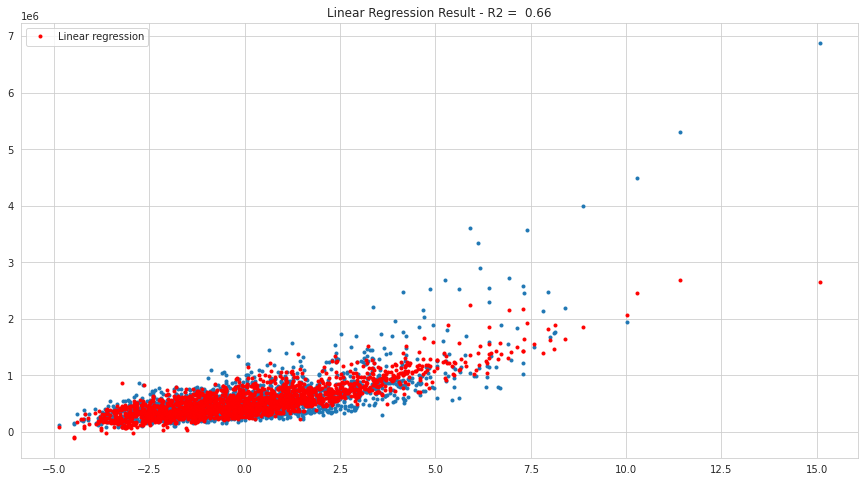

In [369]:
pca = PCA(1)
pca.fit(model[:-1].transform(X_train))
X_test_pca = pca.transform(model[:-1].transform(X_test))
plt.figure(figsize = (15,8))
plt.plot(X_test_pca,y_test,'.')
plt.plot(X_test_pca,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [370]:
betas = model["model"].coef_[0]
intercept = model["model"].intercept_[0]
n_features = model.n_features_in_
poly_features = X_train.columns
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"

In [371]:
print(model_string)

y = -35668.70 * bedrooms + 31880.11 * bathrooms + 74278.73 * sqft_living + 709.03 * sqft_lot + 17063.92 * floors + 48347.72 * waterfront + 31665.30 * view + 13814.99 * condition + 140605.41 * grade + 61706.89 * sqft_above + 38643.73 * sqft_basement +-104165.38 * yr_built + 5346.30 * yr_renovated + 19878.29 * sqft_living15 +-14985.44 * sqft_lot15 + 539150.74


## Polynomial

In [372]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False, interaction_only  = False)),("scaler", StandardScaler()), ("model",LinearRegression())])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [373]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 123177.82003364257
Mean Squared Error Train: 33462085426.731426
Root Mean Squared Error Train: 182926.44813348184
R2 score Train: 0.7469521563753349


Mean Absolute Error test: 121306.3696141217
Mean Squared Error test: 34695888490.19002
Root Mean Squared Error test: 186268.32390449542
R2 score test: 0.7797762652531899


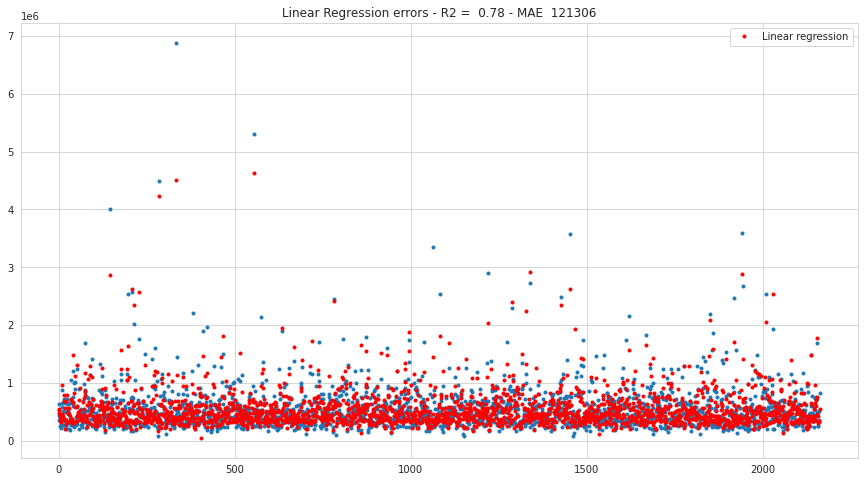

In [374]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f} - MAE {mae_test: .0f}",)
plt.legend();

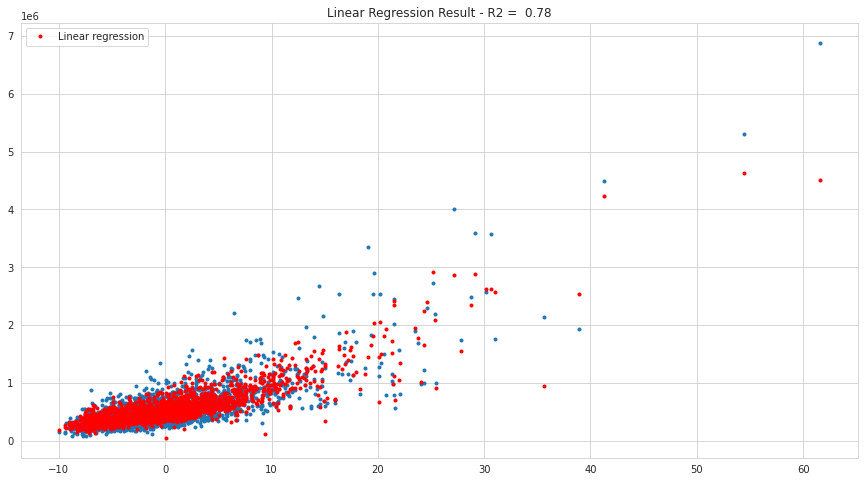

In [375]:
pca = PCA(1)
pca.fit(model[:-1].transform(X_train))
X_test_pca = pca.transform(model[:-1].transform(X_test))
plt.figure(figsize = (15,8))
plt.plot(X_test_pca,y_test,'.')
plt.plot(X_test_pca,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [376]:
betas = model["model"].coef_[0]
intercept = model["model"].intercept_[0]
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names()
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [377]:
print(model_string)

y =  871970.18 * x0 +-840473.59 * x1 + 489773777374153.19 * x2 +-1152061.70 * x3 +-1114926.70 * x4 + 57241959988875.05 * x5 +-221414.64 * x6 + 363291.88 * x7 + 1292907.49 * x8 +-441217496971885.56 * x9 +-236871954327040.56 * x10 +-2519878.59 * x11 +-1190988.01 * x12 + 2740163.18 * x13 +-929361.34 * x14 + 9822.12 * x0^2 + 31788.80 * x0 x1 + 556665163988724.75 * x0 x2 +-2748.10 * x0 x3 + 21212.18 * x0 x4 +-3432.91 * x0 x5 +-893.00 * x0 x6 +-21089.18 * x0 x7 +-50479.11 * x0 x8 +-474633628365836.06 * x0 x9 +-214276135743863.94 * x0 x10 +-864611.58 * x0 x11 +-13386.00 * x0 x12 + 63027.40 * x0 x13 + 20657.69 * x0 x14 +-35562.29 * x1^2 +-2946482760409829.00 * x1 x2 +-15346.51 * x1 x3 +-53721.70 * x1 x4 + 10660.31 * x1 x5 + 8241.02 * x1 x6 +-3091.99 * x1 x7 + 182851.65 * x1 x8 + 2519191697095810.00 * x1 x9 + 956279638106868.62 * x1 x10 + 778233.22 * x1 x11 +-17066.81 * x1 x12 +-50896.19 * x1 x13 +-4325.33 * x1 x14 +-647469779365159.25 * x2^2 +-1081577245032508.50 * x2 x3 + 3520528161238970.00 

## Ridge

In [378]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False, interaction_only  = False)),("scaler", StandardScaler()), 
                          ("model",Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [379]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 124670.69990815151
Mean Squared Error Train: 34375399062.08117
Root Mean Squared Error Train: 185406.03836466916
R2 score Train: 0.7400454724962234


Mean Absolute Error test: 122250.06187113284
Mean Squared Error test: 35306176716.29711
Root Mean Squared Error test: 187899.3792334001
R2 score test: 0.7759026087978058


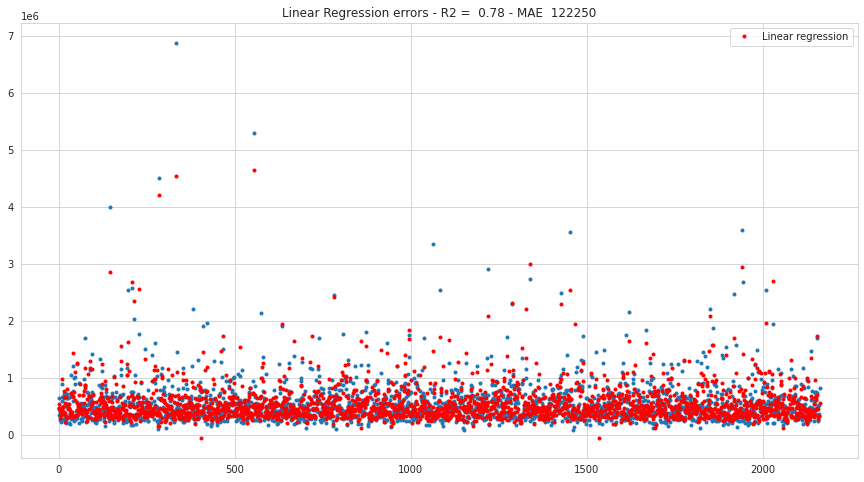

In [380]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f} - MAE {mae_test: .0f}",)
plt.legend();

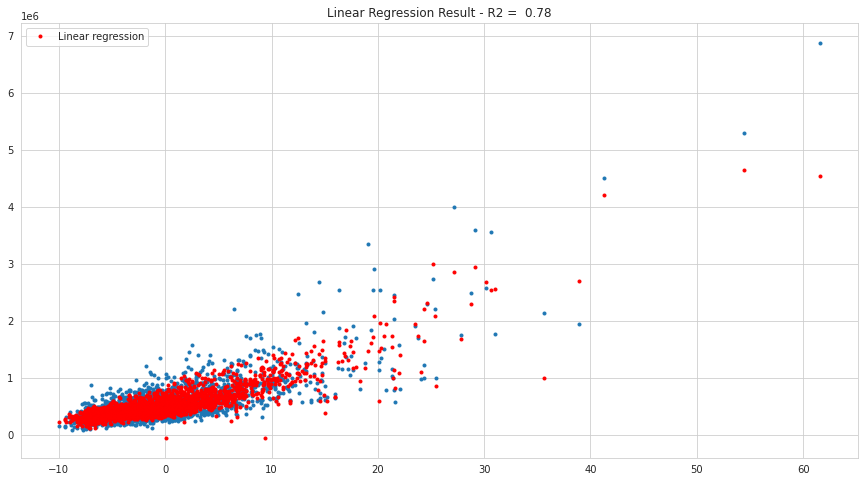

In [381]:
pca = PCA(1)
pca.fit(model[:-1].transform(X_train))
X_test_pca = pca.transform(model[:-1].transform(X_test))
plt.figure(figsize = (15,8))
plt.plot(X_test_pca,y_test,'.')
plt.plot(X_test_pca,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [382]:
betas = model["model"].coef_[0]
intercept = model["model"].intercept_[0]
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names()
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [383]:
print(model_string)

y =  152987.99 * x0 +-16650.72 * x1 + 38140.87 * x2 +-161078.27 * x3 +-33862.13 * x4 +-50203.69 * x5 +-22593.55 * x6 + 148318.81 * x7 + 169552.79 * x8 + 14662.26 * x9 + 51551.70 * x10 +-161064.08 * x11 +-93332.70 * x12 + 274916.55 * x13 +-90477.98 * x14 + 10390.27 * x0^2 +-4045.56 * x0 x1 +-29078.58 * x0 x2 +-24597.12 * x0 x3 + 16948.40 * x0 x4 +-6148.85 * x0 x5 + 694.86 * x0 x6 +-3042.08 * x0 x7 +-41287.38 * x0 x8 +-21033.29 * x0 x9 +-28952.94 * x0 x10 +-152046.66 * x0 x11 +-1600.45 * x0 x12 + 60846.40 * x0 x13 + 22940.23 * x0 x14 +-5298.74 * x1^2 + 54025.15 * x1 x2 +-116.96 * x1 x3 +-45641.67 * x1 x4 + 13541.75 * x1 x5 + 9723.41 * x1 x6 +-44915.55 * x1 x7 + 136781.41 * x1 x8 + 64086.20 * x1 x9 +-2364.65 * x1 x10 + 18434.23 * x1 x11 +-24575.93 * x1 x12 +-82767.66 * x1 x13 + 6194.75 * x1 x14 + 10480.03 * x2^2 +-32276.23 * x2 x3 + 504.86 * x2 x4 + 38161.20 * x2 x5 +-27560.70 * x2 x6 + 28082.94 * x2 x7 + 159515.02 * x2 x8 + 12838.65 * x2 x9 +-732.00 * x2 x10 +-156925.20 * x2 x11 + 13510.

## Lasso

In [384]:
model = Pipeline(steps = [("poly", PolynomialFeatures(degree = 2, include_bias = False, interaction_only  = False)),("scaler", StandardScaler()), 
                          ("model",Lasso(alpha = 5,  random_state = 42))])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.102e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [385]:

r2 = (metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error Train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error Train:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error Train:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score Train:', r2)
print("\n")
r2_test = (metrics.r2_score(y_test, y_test_pred))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score test:', r2_test)
r2s.append(r2_test)
maes.append(mae_test)

Mean Absolute Error Train: 124962.00868407247
Mean Squared Error Train: 34509357531.92857
Root Mean Squared Error Train: 185766.9441314266
R2 score Train: 0.7390324483078665


Mean Absolute Error test: 122452.54108189295
Mean Squared Error test: 35330490038.51589
Root Mean Squared Error test: 187964.0658171553
R2 score test: 0.7757482858835898


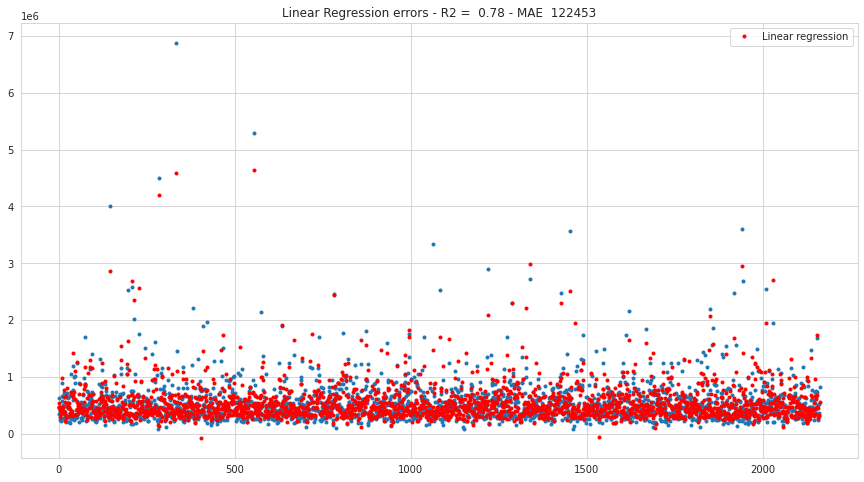

In [386]:
plt.figure(figsize = (15,8))
plt.plot(y_test.values,'.')
plt.plot(y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression errors - R2 = {r2_test: .2f} - MAE {mae_test: .0f}",)
plt.legend();

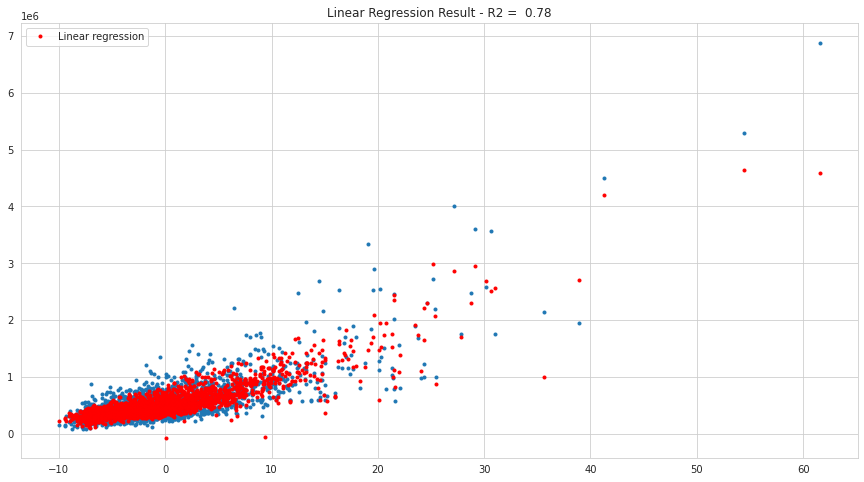

In [387]:
pca = PCA(1)
pca.fit(model[:-1].transform(X_train))
X_test_pca = pca.transform(model[:-1].transform(X_test))
plt.figure(figsize = (15,8))
plt.plot(X_test_pca,y_test,'.')
plt.plot(X_test_pca,y_test_pred,"r.",label = "Linear regression")
plt.title(f"Linear Regression Result - R2 = {r2_test: .2f}",)
plt.legend();

In [389]:
betas = model["model"].coef_
intercept = model["model"].intercept_[0]
n_features = model.n_features_in_
poly_features = model["poly"].get_feature_names()
model_string = f"y = " + " +".join([f"{beta: .2f} * {X_i}" for X_i,beta in zip(poly_features,betas)]) + f" +{intercept: .2f}"

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [390]:
print(model_string)

y =  109522.96 * x0 + 116658.87 * x1 + 67090.53 * x2 +-112877.53 * x3 +-19159.81 * x4 + 23210.85 * x5 + 51458.91 * x6 + 79557.75 * x7 + 207848.54 * x8 +-142867.68 * x9 +-16554.61 * x10 +-109464.54 * x11 +-90698.39 * x12 + 84732.80 * x13 +-38887.24 * x14 + 10908.68 * x0^2 +-11825.43 * x0 x1 +-98291.07 * x0 x2 +-25806.15 * x0 x3 + 18808.08 * x0 x4 +-6561.00 * x0 x5 +-45.87 * x0 x6 +-6329.01 * x0 x7 +-35068.29 * x0 x8 + 29262.42 * x0 x9 +-954.18 * x0 x10 +-108317.95 * x0 x11 +-0.00 * x0 x12 + 67641.84 * x0 x13 + 24819.08 * x0 x14 + 2449.91 * x1^2 + 177699.34 * x1 x2 +-836.04 * x1 x3 +-53741.65 * x1 x4 + 13433.02 * x1 x5 + 12454.41 * x1 x6 +-54238.55 * x1 x7 + 148755.99 * x1 x8 +-39627.28 * x1 x9 +-46776.36 * x1 x10 +-106464.30 * x1 x11 +-26876.12 * x1 x12 +-99217.86 * x1 x13 + 9285.02 * x1 x14 + 99650.85 * x2^2 +-23987.45 * x2 x3 + 5016.26 * x2 x4 +-19878.58 * x2 x5 + 75535.56 * x2 x6 +-30916.41 * x2 x7 + 223016.11 * x2 x8 +-226001.46 * x2 x9 + 36179.84 * x2 x10 +-100214.96 * x2 x11 + 147

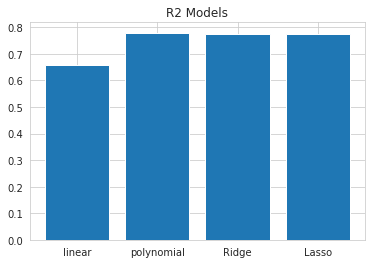

In [391]:

plt.bar(["linear","polynomial","Ridge","Lasso"], r2s)
plt.title( "R2 Models");

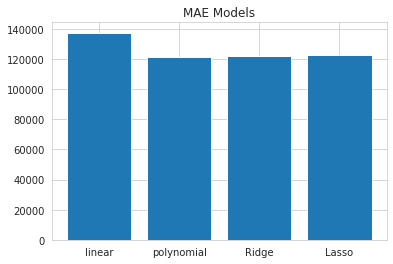

In [392]:

plt.bar(["linear","polynomial","Ridge","Lasso"], maes)
plt.title( "MAE Models");

* ¿que método conviene más a la empresa?
Ridge a pesar de que el modelo polinomial tiene mejor performance

* ¿por que?
Porque es el modelo que tiene mejores metricas junto con el polinomial, además que incorpora un metodo de regularización que evita el sobre ajuste. Más aún que estamos usando multiples variables 


* ¿que porcentajes de entrenamiento y evaluación usaste?
90% de entrenamiento y  10% para testeo 


* ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
 Tiene un r2 score de .78. Considero que es bueno comparando los resultados de los demás modelos lineales.

Los modelos lineales son importantes para conocer el funcionamiento general de un modelo, además que muchos otros algoritmos estan basados en ellos. Además que muchas veces para resolver cierto problema no es necesario complicar la solución y solamente con un modelo lineal simple puede servir para la problematica